In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [2]:
DATADIR = "C:/Users/Ren.DESKTOP-IJNN7GO/Desktop/dataset"
CATEGORIES = ["brick", "notbrick"]

In [3]:
#retrieving image files, in case they are needed later
brick_path = "C:/Users/Ren.DESKTOP-IJNN7GO/Desktop/dataset/brick"
notbrick_path = "C:/Users/Ren.DESKTOP-IJNN7GO/Desktop/dataset/notbrick"
brick_img_files = os.listdir(brick_path)
notbrick_img_files = os.listdir(notbrick_path)

# for f in files:
#     print(f)

import pandas as pd
brick_df = pd.DataFrame({
    'brick_img_files': brick_img_files,
    'category': 0
})

In [4]:
notbrick_df = pd.DataFrame({
    'notbrick_img_files': notbrick_img_files,
    'category': 1
})

In [5]:
print(len(brick_df))
brick_df.head()

841


,brick_img_files,category
0,0-New-Construction-Real-Estate-For-Sale-O27Fal...,0
1,0-New-Construction-Real-Estate-For-Sale-O27Fal...,0
2,00775a774672dddc5f859ec4169ccfc5l-m2503259883o...,0
3,01_15BarringtonHillsRd_575_FrontView_HiRes-114...,0
4,02092012103016_ritz-craft-advantages-ext.jpg,0


In [6]:
print(len(notbrick_df))
notbrick_df.head()

871


,notbrick_img_files,category
0,001_Toll_8_21_17_1920.jpg,1
1,016a5535.jpg,1
2,02Home102-768x432.jpg,1
3,04.jpg,1
4,049-209Victorian-lowRES20copy_crp.jpg,1


In [7]:
#stack dataframes vertically
#randomize based on category column
vertical_stack = pd.concat([brick_df, notbrick_df], axis=0)
print(len(vertical_stack))

1712


In [8]:
all_dfs = [brick_df, notbrick_df]

# Give all df's common column names
for df in all_dfs:
    df.columns = ['img_files', 'category']

combined_df = pd.concat(all_dfs).reset_index(drop=True)

In [9]:
len(combined_df)

1712

In [10]:
combined_df.head(1600)

,img_files,category
0,0-New-Construction-Real-Estate-For-Sale-O27Fal...,0
1,0-New-Construction-Real-Estate-For-Sale-O27Fal...,0
2,00775a774672dddc5f859ec4169ccfc5l-m2503259883o...,0
3,01_15BarringtonHillsRd_575_FrontView_HiRes-114...,0
4,02092012103016_ritz-craft-advantages-ext.jpg,0
...,...,...
1595,shutterstock-Vinyl-Siding-5.jpg,1
1596,siding-8.jpg,1
1597,siding-category-page-redesign-hero3.jpg,1
1598,siding-costs-and-conversation.jpg,1


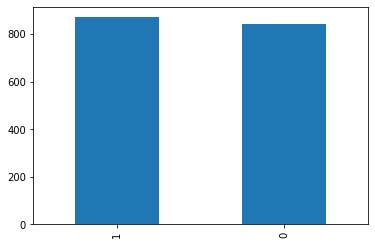

In [11]:
combined_df['category'].value_counts().plot.bar()

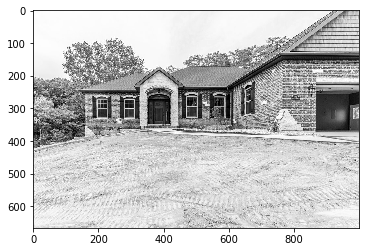

In [12]:
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

In [13]:
print(img_array)

[[250 250 250 ... 199 201 207]
 [251 251 251 ... 207 209 215]
 [251 251 251 ... 153 158 165]
 ...
 [227 232 235 ... 243 243 242]
 [220 223 225 ... 247 248 248]
 [220 219 221 ... 247 249 249]]


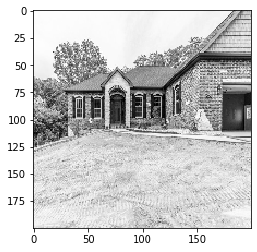

In [14]:
IMG_SIZE = 200

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')
plt.show()

In [15]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
            
create_training_data()

In [16]:
print(len(training_data))

1709


In [17]:
import random

random.shuffle(training_data)

In [18]:
#sample at index 1 is label
for sample in training_data[:10]:
    print(sample[1])

0
1
1
0
1
1
0
0
0
1


In [19]:
training_data[:15]

[[array([[157, 151, 140, ...,  99, 165, 139],
         [157, 151, 140, ...,  96,  67, 148],
         [160, 158, 157, ...,  45,  85, 127],
         ...,
         [ 48,  64,  53, ...,  52,  69,  66],
         [ 43,  59,  41, ...,  61,  64,  69],
         [ 41,  25,  33, ...,  54,  75,  61]], dtype=uint8),
  0],
 [array([[215, 218, 212, ..., 182, 183, 182],
         [216, 218, 230, ..., 180, 186, 182],
         [215, 216, 230, ..., 182, 186, 177],
         ...,
         [102, 114, 109, ...,  60,  60, 123],
         [106, 102, 128, ...,  73,  85, 106],
         [121, 109, 125, ..., 123, 102,  71]], dtype=uint8),
  1],
 [array([[114, 114, 114, ..., 109, 109, 106],
         [114, 114, 114, ..., 109, 109, 106],
         [114, 114, 114, ..., 109, 109, 106],
         ...,
         [ 48,  45,  68, ...,  84,  85, 103],
         [ 56,  44,  65, ...,  85,  78, 111],
         [ 57,  57,  86, ...,  73,  92,  67]], dtype=uint8),
  1],
 [array([[206, 198, 196, ..., 249, 250, 251],
         [205, 196, 1

In [20]:
X = []
y = []

In [21]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)

In [22]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [23]:
pickle_in_X = open("X.pickle", "rb")
#pickle_in_y = open("y.pickle", "rb")
X = pickle.load(pickle_in_X)
#y = pickle.load(pickle_in_y)

In [24]:
#X[1]

In [25]:
#y[1]

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle

X = pickle.load(open("X.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))

X = X/255.0

model = Sequential()
model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid", data_format=None))
model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

model.fit(X, y, batch_size=22, validation_split=0.1)

70/70 [==============================] - 56s 797ms/step - loss: 12.1682 - accuracy: 0.5312 - val_loss: 0.7104 - val_accuracy: 0.5673


In [27]:
model.save("brick_trained.h5")

In [28]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

combined_df['category'] = combined_df['category'].replace({0:'brick', 1:'notbrick'})

train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

In [29]:
train_df.shape

(696, 2)

In [30]:
validate_df.shape

(175, 2)